In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from RAVEN.pe.mac_taylor_utils import *
import matplotlib.pyplot as plt

# test MAC_Taylor

In [2]:
a = torch.arange(0, 1, 0.001).cuda()

precise = torch.exp(a).cuda()

point = 0.5
scale = torch.exp(torch.tensor([point])).cuda()
var = a - point

coeff = [1/1, 1/1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040, 1/40320, 1/362880]

coeff = coeff[0:8]
print(coeff)

approximate = MAC_Taylor(scale, 
                         coeff, 
                         var, 
                         fxp=True, 
                         intwidth=7, 
                         fracwidth=8, 
                         rounding_coeff="round", 
                         rounding_var="floor", 
                         keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984]
min error rate: tensor(-0.0118, device='cuda:0')
max error rate: tensor(-0.0001, device='cuda:0')
avg error rate: tensor(-0.0053, device='cuda:0')
rms error rate: tensor(0.0056, device='cuda:0')


# point search test

## test exp

### fxp guassian

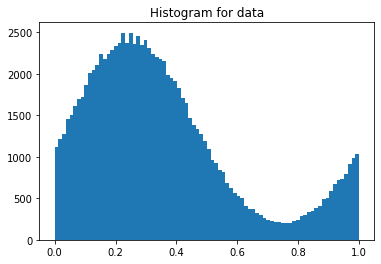

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.0617252998', '-0.0120686144', '-0.0021046840', '-0.0002893918', '-0.0000747293']
rms error: ['0.0921729431', '0.0231769383', '0.0048856153', '0.0011578299', '0.0009167876']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698', '-0.0025743698']
max error: ['0.0021472657', '0.0077213040', '0.0043279962', '0.0045673698', '0.0043279962']
avg error: ['-0.0257483199', '-0.0029178776', '0.0001817673', '0.0007444426', '0.0007301119']
rms error: ['0.0502973571', '0.0100758886', '0.0019

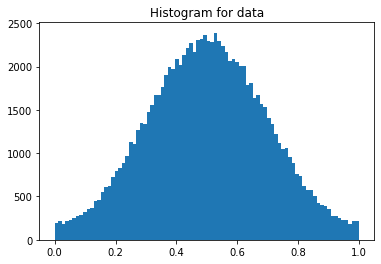

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.0965018272', '-0.0186770242', '-0.0028548327', '-0.0002862531', '-0.0000608347']
rms error: ['0.1120038256', '0.0246139932', '0.0044350452', '0.0010196869', '0.0008641513']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698', '-0.0025743698']
max error: ['0.0021472657', '0.0077213040', '0.0043279962', '0.0045673698', '0.0043279962']
avg error: ['-0.0372522511', '-0.0043114135', '0.0002326346', '0.0008337407', '0.0008460309']
rms error: ['0.0525005013', '0.0085477028', '0.001598

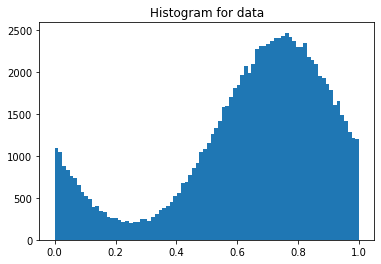

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.1447844058', '-0.0343208238', '-0.0063293176', '-0.0008547304', '-0.0002532891']
rms error: ['0.1613637656', '0.0406447612', '0.0080797914', '0.0014264910', '0.0008958472']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698']
max error: ['0.0021472657', '0.0077213040', '0.0043279962', '0.0045673698']
avg error: ['-0.0754571930', '-0.0119676050', '-0.0008633268', '0.0007842805']
rms error: ['0.0888840333', '0.0164695513', '0.0022823154', '0.0013761234']

gaussian data mu= 0.75 Taylor expansio

In [10]:
point_search(func="exp", uniform=False, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

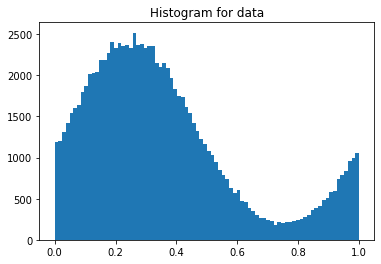

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001738', '0.0000001738']
avg error: ['-0.0618219338', '-0.0120556187', '-0.0021146152', '-0.0003322152', '-0.0000465535', '-0.0000058265', '-0.0000006582', '-0.0000000721']
rms error: ['0.0923542902', '0.0232422706', '0.0049263933', '0.0008790937', '0.0001341659', '0.0000178184', '0.0000020878', '0.0000002241']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

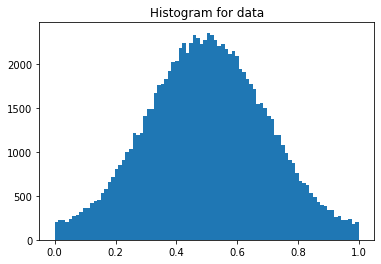

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001738', '0.0000001738']
avg error: ['-0.0961902738', '-0.0185636263', '-0.0029471277', '-0.0004011242', '-0.0000480514', '-0.0000051583', '-0.0000005070', '-0.0000000523']
rms error: ['0.1117588356', '0.0245324858', '0.0044862214', '0.0007053068', '0.0000972418', '0.0000119209', '0.0000013136', '0.0000001474']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

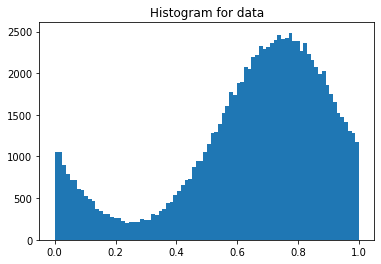

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001738', '0.0000001738']
avg error: ['-0.1449695826', '-0.0343626030', '-0.0065034805', '-0.0010269994', '-0.0001394336', '-0.0000166245', '-0.0000017682', '-0.0000001695']
rms error: ['0.1615024060', '0.0407057032', '0.0082365824', '0.0013932951', '0.0002025021', '0.0000257874', '0.0000029156', '0.0000002977']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

In [11]:
point_search(func="exp", uniform=False, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

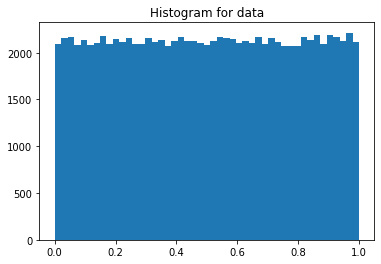

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.1038941741', '-0.0234594624', '-0.0042889416', '-0.0005907608', '-0.0001647398']
rms error: ['0.1323457360', '0.0335102119', '0.0068030851', '0.0013194098', '0.0009079344']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698', '-0.0025743698']
max error: ['0.0021472657', '0.0077213040', '0.0043279962', '0.0045673698', '0.0043279962']
avg error: ['-0.0513130687', '-0.0075847977', '-0.0003723363', '0.0007615584', '0.0007969904']
rms error: ['0.0731197819', '0.0139412554', '0.00218

In [12]:
point_search(func="exp", uniform=True, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

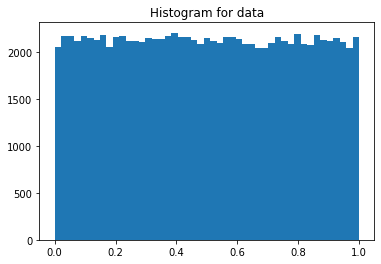

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001738', '0.0000001738']
avg error: ['-0.1032595858', '-0.0232319664', '-0.0043276493', '-0.0006855101', '-0.0000942709', '-0.0000114398', '-0.0000012428', '-0.0000001243']
rms error: ['0.1317313761', '0.0333269201', '0.0068582641', '0.0011830202', '0.0001751779', '0.0000226838', '0.0000026022', '0.0000002700']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

In [13]:
point_search(func="exp", uniform=True, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test div

### fxp guassian

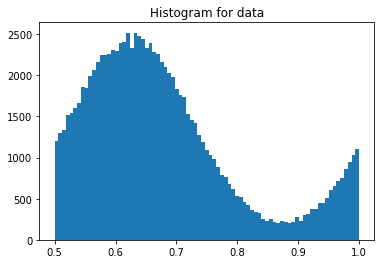

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.1190959513', '-0.0462686010', '-0.0185992531', '-0.0077553159', '-0.0033143449', '-0.0014929539', '-0.0008868615', '-0.0006858776']
rms error: ['0.1365857869', '0.0570377260', '0.0246918295', '0.0110131260', '0.0050262748', '0.0023208945', '0.0013319288', '0.0010382441']



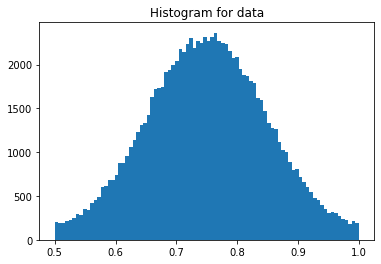

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.0721220374', '-0.0226284117', '-0.0076910239', '-0.0028331433', '-0.0011857324', '-0.0006773758', '-0.0005481881', '-0.0005148674']
rms error: ['0.0879662707', '0.0321739577', '0.0127070891', '0.0053919856', '0.0024568893', '0.0013324106', '0.0010482016', '0.0009911620']



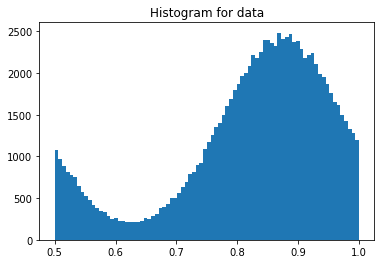

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.0468646660', '-0.0156168835', '-0.0061828904', '-0.0027485113', '-0.0013963152', '-0.0008134335', '-0.0005664828', '-0.0004538168']
rms error: ['0.0779162422', '0.0334984809', '0.0153271053', '0.0072029489', '0.0034931414', '0.0018229863', '0.0012113777', '0.0010394336']



In [14]:
point_search(func="div", uniform=False, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

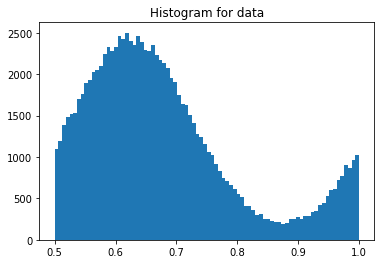

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.1190955639', '-0.0462931916', '-0.0186146833', '-0.0076841540', '-0.0032402317', '-0.0013906159', '-0.0006056998', '-0.0002671506']
rms error: ['0.1364356279', '0.0569230467', '0.0246109515', '0.0109133692', '0.0049305363', '0.0022593576', '0.0010468030', '0.0004892748']



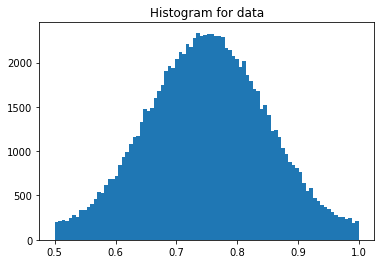

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0721617937', '-0.0228647385', '-0.0077733775', '-0.0027944385', '-0.0010511191', '-0.0004103885', '-0.0001652514', '-0.0000682806']
rms error: ['0.0881667510', '0.0324210040', '0.0128550688', '0.0053693946', '0.0023267178', '0.0010353101', '0.0004697429', '0.0002162762']



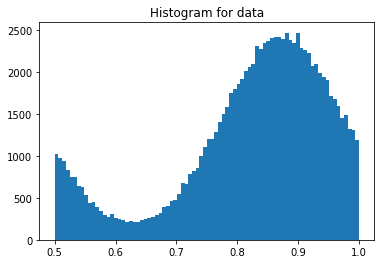

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0469941571', '-0.0157692581', '-0.0061056106', '-0.0025653949', '-0.0011290596', '-0.0005105765', '-0.0002347792', '-0.0001091525']
rms error: ['0.0781383961', '0.0336014666', '0.0153223602', '0.0071504945', '0.0033759971', '0.0016054360', '0.0007673639', '0.0003682339']



In [15]:
point_search(func="div", uniform=False, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

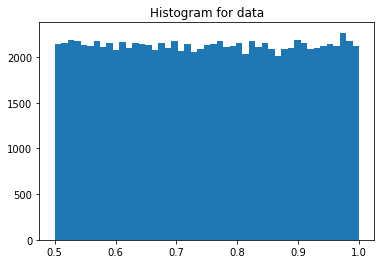

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.0835480615', '-0.0313116014', '-0.0126060275', '-0.0053623961', '-0.0024135290', '-0.0011858188', '-0.0007378915', '-0.0005708217']
rms error: ['0.1121142358', '0.0474280566', '0.0209588613', '0.0095308376', '0.0044424473', '0.0021389129', '0.0012858092', '0.0010360981']



In [16]:
point_search(func="div", uniform=True, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

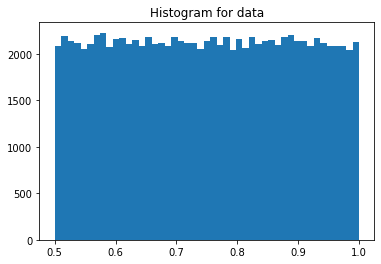

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0834862292', '-0.0313099213', '-0.0125242546', '-0.0052182372', '-0.0022362052', '-0.0009782468', '-0.0004347326', '-0.0001956151']
rms error: ['0.1119118109', '0.0472885333', '0.0208501853', '0.0094291177', '0.0043366458', '0.0020186650', '0.0009481860', '0.0004485098']



In [17]:
point_search(func="div", uniform=True, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test log

### fxp guassian

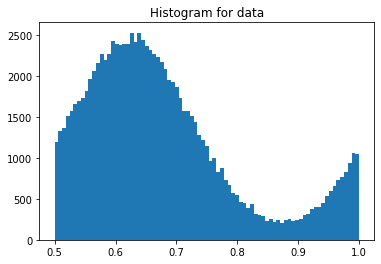

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-1.6572943926', '0.9599785805', '-0.6632390618', '0.4971259236', '-0.3912841380', '0.3177279234', '-0.2758736312', '0.2325671613']
rms error: ['7.7233786583', '4.7325949669', '3.4171669483', '2.6264462471', '2.1225304604', '1.7379183769', '1.5382376909', '1.3307505846']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025',

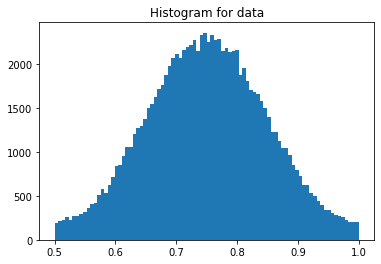

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-0.8785020113', '0.4348644912', '-0.2637051046', '0.1784505844', '-0.1293254495', '0.0985989720', '-0.0813646987', '0.0657722652']
rms error: ['3.6217820644', '2.1959671974', '1.5729293823', '1.2028847933', '0.9685332775', '0.7914220691', '0.6985453367', '0.6028506160']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025', '

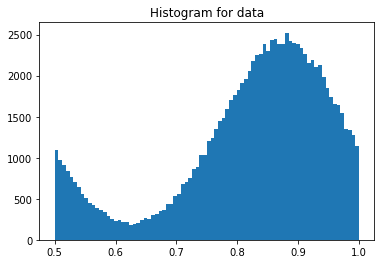

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-2.9873852730', '1.6834985018', '-1.1195416451', '0.8089808226', '-0.6174126267', '0.4888906479', '-0.4134195149', '0.3415376544']
rms error: ['8.4923410416', '5.1781311035', '3.7190828323', '2.8495264053', '2.2959921360', '1.8783612251', '1.6586825848', '1.4311592579']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025',

In [18]:
point_search(func="log", uniform=False, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

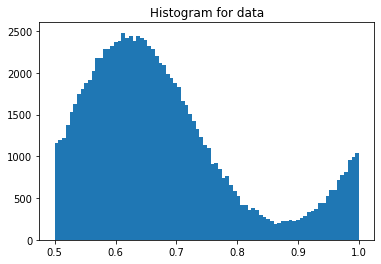

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618820190', '-0.0000000921', '-15.9861564636', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638847351', '0.0000000910', '14.0089483261']
avg error: ['-1.6352264881', '0.9567773342', '-0.6590256095', '0.4949136674', '-0.3918406963', '0.3214503527', '-0.2705177665', '0.2320745587']
rms error: ['7.6903781891', '4.7718362808', '3.4154145718', '2.6393060684', '2.1389856339', '1.7905286551', '1.5343499184', '1.3383280039']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677',

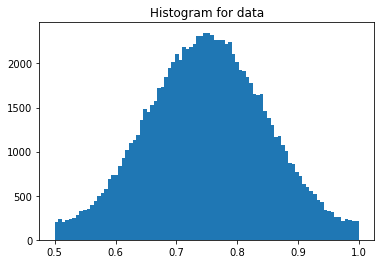

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618820190', '-0.0000000921', '-15.9861564636', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638847351', '0.0000000910', '14.0089483261']
avg error: ['-0.8744793534', '0.4381857216', '-0.2656556666', '0.1802067161', '-0.1316185445', '0.1012451723', '-0.0808974132', '0.0665279180']
rms error: ['3.6661996841', '2.2514238358', '1.6005822420', '1.2310163975', '0.9941526651', '0.8299320340', '0.7096400857', '0.6178712845']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677', '

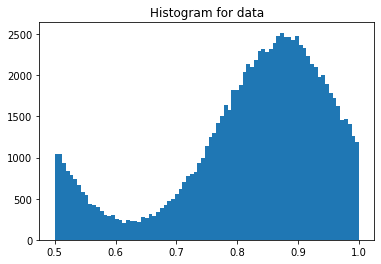

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618820190', '-0.0000000921', '-15.9861564636', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638847351', '0.0000000910', '14.0089483261']
avg error: ['-2.9898452759', '1.7010046244', '-1.1307890415', '0.8201521635', '-0.6290941834', '0.5017806888', '-0.4119587541', '0.3458097875']
rms error: ['8.5605077744', '5.2834129333', '3.7656707764', '2.9001805782', '2.3439462185', '1.9576067924', '1.6742703915', '1.4579406977']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677',

In [19]:
point_search(func="log", uniform=False, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

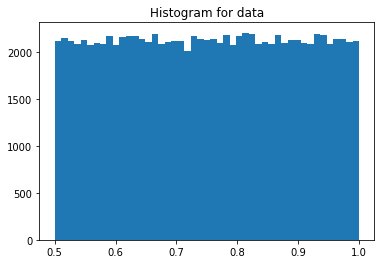

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-2.4572703838', '1.4055546522', '-0.9522405863', '0.7002001405', '-0.5426028967', '0.4349840581', '-0.3725725412', '0.3110391796']
rms error: ['8.5652942657', '5.2372608185', '3.7735195160', '2.8964235783', '2.3383033276', '1.9137775898', '1.6922663450', '1.4628964663']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025', '-4

In [20]:
point_search(func="log", uniform=True, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

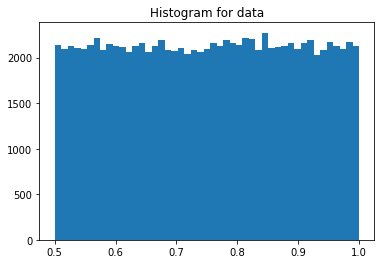

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618820190', '-0.0000000921', '-15.9861564636', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638847351', '0.0000000910', '14.0089483261']
avg error: ['-2.4328656197', '1.4036039114', '-0.9483231902', '0.6987156272', '-0.5437216759', '0.4393126070', '-0.3648232818', '0.3093625009']
rms error: ['8.4422912598', '5.2242784500', '3.7312297821', '2.8783605099', '2.3293871880', '1.9475657940', '1.6672010422', '1.4529085159']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677', '-0

In [21]:
point_search(func="log", uniform=True, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)